In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\Alex\AppData\Local\Temp\ipykernel_1488\2000247249.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('sandler.csv')

In [23]:
# Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов. 
# Столбцы: 
# Date - дата премьеры
# Title - название 
# Genre - жанр
# Studio - студия 
# Theaters - число кинотеатров 
# Opening Gross - доход от премьеры 
# Opening Theaters - число кинотеатров для премьеры
# Gross - общий доход

In [3]:
df.head()

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734


In [4]:
df.shape

(31, 8)

In [7]:
df.columns

Index(['Date', 'Title', 'Genre', 'Studio', 'Theaters', 'Opening Gross',
       'Opening Theaters', 'Gross'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              31 non-null     object
 1   Title             31 non-null     object
 2   Genre             31 non-null     object
 3   Studio            31 non-null     object
 4   Theaters          31 non-null     object
 5   Opening Gross     31 non-null     object
 6   Opening Theaters  31 non-null     object
 7   Gross             31 non-null     object
dtypes: object(8)
memory usage: 2.1+ KB


In [10]:
df.describe().T

,count,unique,top,freq
Date,31,31,13.03.1992,1
Title,31,31,Shakes the Clown,1
Genre,31,3,Comedy,26
Studio,31,9,Sony,12
Theaters,31,31,9,1
Opening Gross,31,31,$35 589,1
Opening Theaters,31,31,9,1
Gross,31,31,$115 103,1


In [12]:
# сделаем предобработку

df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))

In [13]:
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)

In [14]:
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Theaters          31 non-null     int64
 1   Opening Gross     31 non-null     int64
 2   Opening Theaters  31 non-null     int64
 3   Gross             31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [40]:
# простая линейная регрессия 
# доход от показа фильмов в зависимости от количества кинотеатров (соответственно столбцы Gross и Theaters). Предскажите, чему будет равен доход для 1700 кинотеатров.

In [42]:
X_s, y_s = df['Theaters'], df['Gross']

In [46]:
X_s, 

(0        9
 1     1978
 2     1229
 3     1318
 4     1887
 5     2069
 6     2242
 7     2837
 8     1776
 9     2782
 10    3254
 11    2910
 12    2788
 13    3239
 14    1293
 15    2246
 16    3656
 17    3612
 18    2587
 19    3654
 20    3764
 21    1747
 22    3501
 23    3466
 24    3684
 25    3008
 26    3534
 27    3548
 28    3438
 29    3030
 30    3491
 Name: Theaters, dtype: int64,
 0        115103
 1      21274717
 2       5751882
 3       6821850
 4      25588734
 5      38824099
 6      21576954
 7      80245725
 8      10023282
 9     161491646
 10    163479795
 11     39464775
 12     57743062
 13    126293452
 14     17844216
 15     35081594
 16    135645823
 17    120908074
 18     42726869
 19    158119460
 20    137355633
 21     19661987
 22    120059556
 23    100018837
 24    110101975
 25     51855045
 26    162001186
 27    103028109
 28     74158157
 29     36931089
 30    133668525
 Name: Gross, dtype: int64)

In [47]:
y_s

0        115103
1      21274717
2       5751882
3       6821850
4      25588734
5      38824099
6      21576954
7      80245725
8      10023282
9     161491646
10    163479795
11     39464775
12     57743062
13    126293452
14     17844216
15     35081594
16    135645823
17    120908074
18     42726869
19    158119460
20    137355633
21     19661987
22    120059556
23    100018837
24    110101975
25     51855045
26    162001186
27    103028109
28     74158157
29     36931089
30    133668525
Name: Gross, dtype: int64

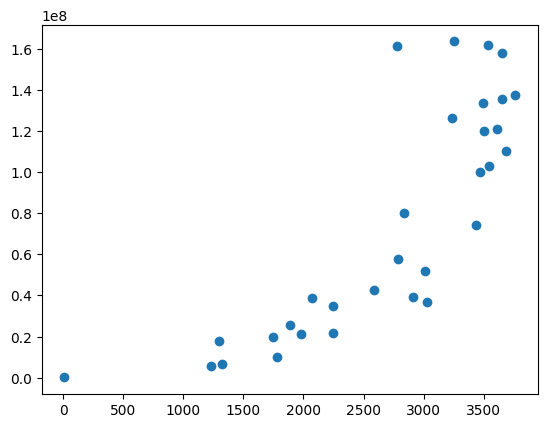

In [48]:
plt.scatter(df["Theaters"], df['Gross'])

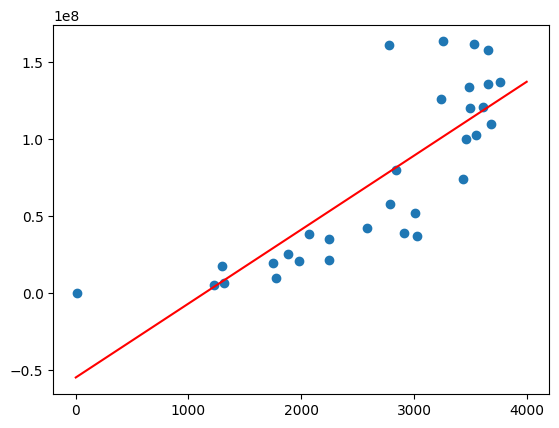

In [60]:
lr_s = LinearRegression(fit_intercept=True)
lr_s.fit(np.array(X_s).reshape(-1, 1), y_s)
a = lr_s.coef_
b = lr_s.intercept_
plt.scatter(df["Theaters"], df['Gross'])
plt.plot([0, 4000], [a*0+b,a*4000+b],'red')
plt.style.use("fivethirtyeight")

In [67]:
y_s_pred = a*1700 + b
print(round(*y_s_pred))

26984713


In [16]:
X1, y = df.drop(["Gross"], axis = 1), df['Gross']

In [17]:
# обучите модель на X1, y 
# сделайте предсказание

In [31]:
X1.head()

,Theaters,Opening Gross,Opening Theaters
0,9,35589,9
1,1978,7100501,1978
2,1229,1911739,1228
3,1318,2307850,1318
4,1887,6639080,1834


In [24]:
# Theaters - число кинотеатров 
# Opening Gross - доход от премьеры 
# Opening Theaters - число кинотеатров для премьеры
# Gross - общий доход

In [38]:
# множественная регрессия
# доход от - 1700 кинотеатров, 1700 открывающих кинотеатров, 5 миллионов дохода от премьеры.

In [26]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X1,y)

LinearRegression()

In [29]:
pd.DataFrame(X1.columns, lr.coef_, columns = ['coef']).sort_values(by='coef', ascending=False)

,coef
13842.067164,Theaters
-17516.683847,Opening Theaters
3.609086,Opening Gross


In [30]:
lr.coef_[0],lr.coef_[1],lr.coef_[2]

(13842.067163566731, 3.609085558473425, -17516.68384742019)

In [36]:
lr.intercept_

4690798.049029216

In [37]:
y_pred = 1700 *lr.coef_[0] + 1700 *lr.coef_[2] + 5000000 *lr.coef_[1] + lr.intercept_
print(round(y_pred))

16489377
